In [1]:
# ----------------------------------------------------------------------------------------------------
# 라이브러리 목록

# 기본 라이브러리 
import numpy as np
import pandas as pd

# 시각화 라이브러리
import matplotlib
import matplotlib.pyplot as plt

# 개인 라이브러리 
from preparation_for_analysis.show_window import DataVisualizer

# pandas 설정
pd.set_option('display.max_rows', None)  # 모든 행 출력
pd.set_option('display.max_columns', None)  # 모든 열 출력

# matplotlib 설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우에서 사용하는 한글 폰트
matplotlib.rcParams['axes.unicode_minus'] = False  # 음수 기호 문제 해결

# preparation_for_analysis 설정
visualizer = DataVisualizer(line="=", length=100, start="#")
# ----------------------------------------------------------------------------------------------------

In [2]:
# ----------------------------------------------------------------------------------------------------
# learning 불러오기 
learning = pd.read_csv("C:\\Users\\ssalt\\Documents\\ev_price_predict_project\\data\\train\\A_df\\c_learning\\1_learning.csv",
                       sep=",",
                       header=0)

visualizer.show_df_info(title="learning.info", df=learning)
# ----------------------------------------------------------------------------------------------------


# Title: learning.info


# DataFrame Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6747 entries, 0 to 6746
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            6747 non-null   object 
 1   Model         6747 non-null   object 
 2   Manufacturer  6747 non-null   object 
 3   Model_year    6747 non-null   int64  
 4   Drivetrain    6747 non-null   object 
 5   Warranty      6747 non-null   int64  
 6   Accident      6747 non-null   object 
 7   Condition     6747 non-null   object 
 8   Battery       4311 non-null   float64
 9   Mileage       6747 non-null   int64  
 10  Price         6747 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 579.9+ KB







In [ ]:
# ----------------------------------------------------------------------------------------------------
# 변수의 분포도 확인 
# ----------------------------------------------------------------------------------------------------

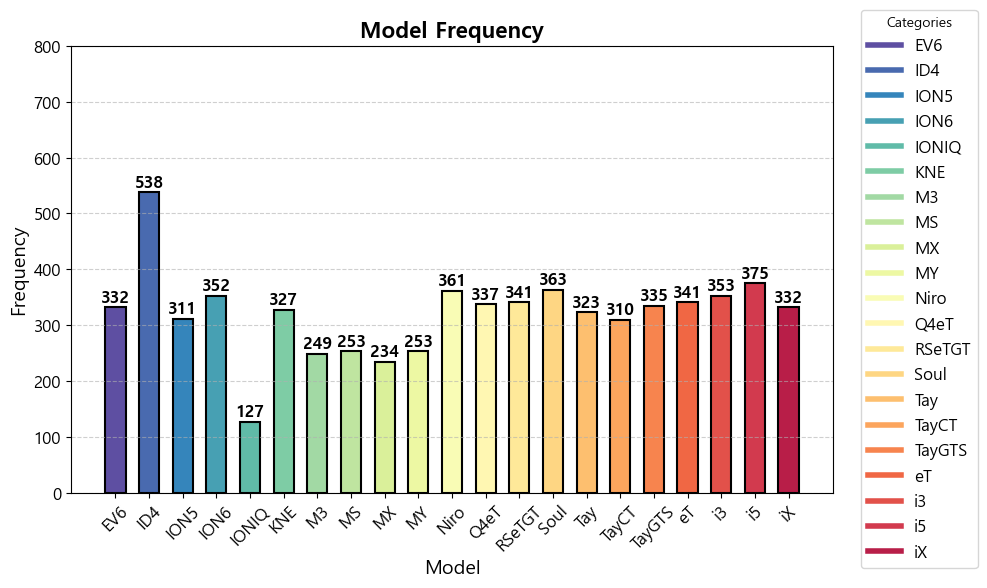

In [3]:
# ----------------------------------------------------------------------------------------------------
# "Model" 컬럼의 분포도 확인 
# 막대 그래프
# 데이터 준비
data = learning["Model"].value_counts().reset_index()
data.sort_values(by="Model",
                 ascending=True,
                 inplace=True)

categories = data["Model"]
values = data["count"]

# 연속적인 색상 맵 사용 
cmap = plt.colormaps["Spectral_r"]  # 'viridis'는 256개의 색상
colors = [cmap(i / len(data)) for i in range(len(data))]  # 데이터를 기반으로 색상을 비율로 할당

# 그래프 크기 설정
fig, ax = plt.subplots(figsize=(10, 6))

# 막대 그래프 그리기
bars = ax.bar(categories, values, color=colors, width=0.6, edgecolor='black', linewidth=1.5)

# 막대 위에 빈도수 표시 및 조정
for i, bar in enumerate(bars):
    height = bar.get_height()
    # 막대 위에 빈도수 텍스트 추가 (오버플로우 방지로 텍스트 위치 조정)
    ax.text(bar.get_x() + bar.get_width() / 2, height + 2, 
            str(height), ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

# x축에 대한 눈금 설정 (set_xticks 사용)
ax.set_xticks(range(len(data)))

# x축 레이블을 설정
ax.set_xlabel('Model', fontsize=14)
ax.set_xticklabels(categories, rotation=45, fontsize=12)

# y축 레이블 설정 및 범위 지정
ax.set_ylabel('Frequency', fontsize=14)
ax.set_ylim(0, 800)

# 그래프 제목 추가
ax.set_title('Model Frequency', fontsize=16, weight='bold')

# 그리드 설정 (배경 그리드)
ax.grid(True, axis='y', linestyle='--', alpha=0.6)

# x축과 y축의 라벨 간격 및 배치 조정
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# 범례 추가 (bbox_to_anchor로 범례 위치 조정)
handles = [plt.Line2D([0], [0], color=color, lw=4) for color in colors]
ax.legend(handles, categories, title="Categories", loc='upper right', fontsize=12, bbox_to_anchor=(1.2, 1.1))

# 레이아웃 자동 조정
plt.tight_layout()

# 그래프 표시
plt.show()
# ----------------------------------------------------------------------------------------------------

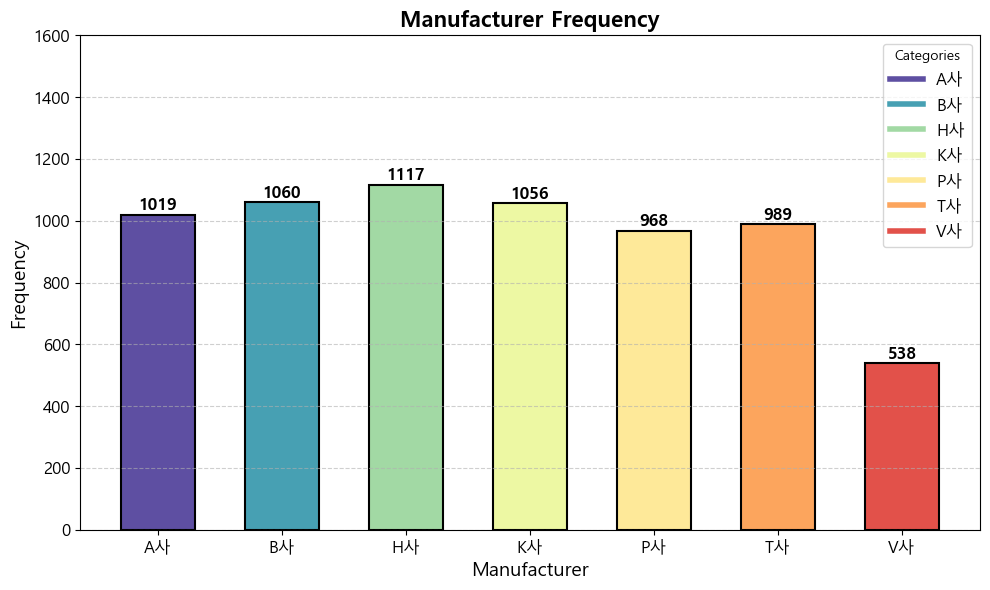

In [4]:
# ----------------------------------------------------------------------------------------------------
# "Manufacturer" 컬럼의 분포도 확인 
# 막대 그래프
# 데이터 준비
data = learning["Manufacturer"].value_counts().reset_index()
data.sort_values(by="Manufacturer",
                 ascending=True,
                 inplace=True)

categories = data["Manufacturer"]
values = data["count"]

# 연속적인 색상 맵 사용 
cmap = plt.colormaps["Spectral_r"]  # 'viridis'는 256개의 색상
colors = [cmap(i / len(data)) for i in range(len(data))]  # 데이터를 기반으로 색상을 비율로 할당

# 그래프 크기 설정
fig, ax = plt.subplots(figsize=(10, 6))

# 막대 그래프 그리기
bars = ax.bar(categories, values, color=colors, width=0.6, edgecolor='black', linewidth=1.5)

# 막대 위에 빈도수 표시 및 조정
for i, bar in enumerate(bars):
    height = bar.get_height()
    # 막대 위에 빈도수 텍스트 추가 (오버플로우 방지로 텍스트 위치 조정)
    ax.text(bar.get_x() + bar.get_width() / 2, height + 2, 
            str(height), ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

# x축에 대한 눈금 설정 (set_xticks 사용)
ax.set_xticks(range(len(data)))

# x축 레이블을 설정
ax.set_xlabel('Manufacturer', fontsize=14)
ax.set_xticklabels(categories, rotation=0, fontsize=12)

# y축 레이블 설정 및 범위 지정
ax.set_ylabel('Frequency', fontsize=14)
ax.set_ylim(0, 1600)

# 그래프 제목 추가
ax.set_title('Manufacturer Frequency', fontsize=16, weight='bold')

# 그리드 설정 (배경 그리드)
ax.grid(True, axis='y', linestyle='--', alpha=0.6)

# x축과 y축의 라벨 간격 및 배치 조정
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# 범례 추가 (범주에 맞는 색상으로 범례 설정)
handles = [plt.Line2D([0], [0], color=color, lw=4) for color in colors]
ax.legend(handles, categories, title="Categories", loc='best', fontsize=12)

# 레이아웃 자동 조정
plt.tight_layout()

# 그래프 표시
plt.show()
# ----------------------------------------------------------------------------------------------------

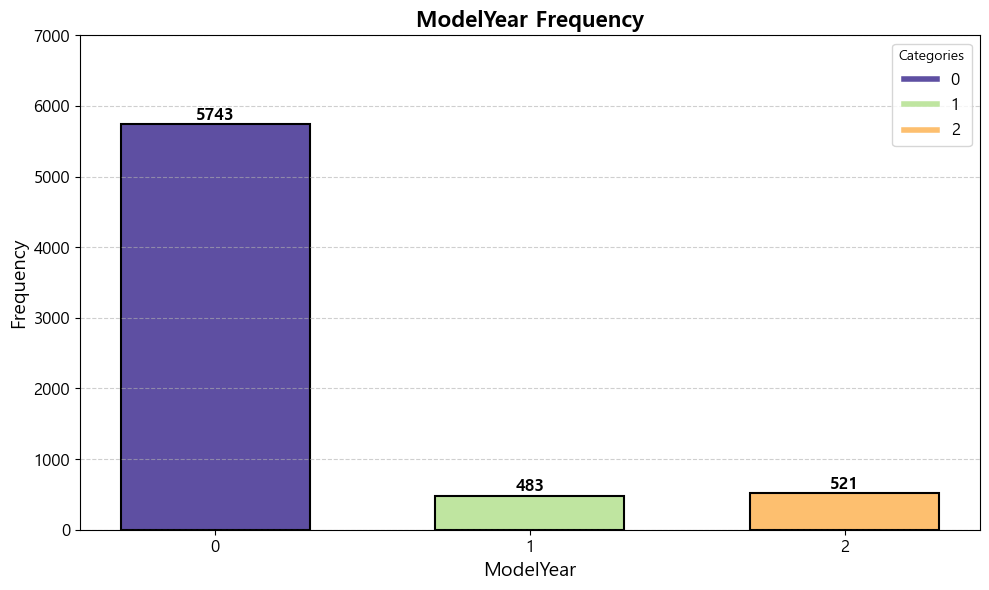

In [6]:
# ----------------------------------------------------------------------------------------------------
# "Model_year" 컬럼의 분포도 확인 
# 막대 그래프
# 데이터 준비
data = learning["Model_year"].value_counts().reset_index()
data.sort_values(by="Model_year",
                 ascending=True,
                 inplace=True)

categories = data["Model_year"]
values = data["count"]

# 연속적인 색상 맵 사용 
cmap = plt.colormaps["Spectral_r"]  # 'viridis'는 256개의 색상
colors = [cmap(i / len(data)) for i in range(len(data))]  # 데이터를 기반으로 색상을 비율로 할당

# 그래프 크기 설정
fig, ax = plt.subplots(figsize=(10, 6))

# 막대 그래프 그리기
bars = ax.bar(categories, values, color=colors, width=0.6, edgecolor='black', linewidth=1.5)

# 막대 위에 빈도수 표시 및 조정
for i, bar in enumerate(bars):
    height = bar.get_height()
    # 막대 위에 빈도수 텍스트 추가 (오버플로우 방지로 텍스트 위치 조정)
    ax.text(bar.get_x() + bar.get_width() / 2, height + 2, 
            str(height), ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

# x축에 대한 눈금 설정 (set_xticks 사용)
ax.set_xticks(range(len(data)))

# x축 레이블을 설정
ax.set_xlabel('ModelYear', fontsize=14)
ax.set_xticklabels(categories, rotation=0, fontsize=12)

# y축 레이블 설정 및 범위 지정
ax.set_ylabel('Frequency', fontsize=14)
ax.set_ylim(0, 7000)

# 그래프 제목 추가
ax.set_title('ModelYear Frequency', fontsize=16, weight='bold')

# 그리드 설정 (배경 그리드)
ax.grid(True, axis='y', linestyle='--', alpha=0.6)

# x축과 y축의 라벨 간격 및 배치 조정
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# 범례 추가 (범주에 맞는 색상으로 범례 설정)
handles = [plt.Line2D([0], [0], color=color, lw=4) for color in colors]
ax.legend(handles, categories, title="Categories", loc='best', fontsize=12)

# 레이아웃 자동 조정
plt.tight_layout()

# 그래프 표시
plt.show()
# ----------------------------------------------------------------------------------------------------

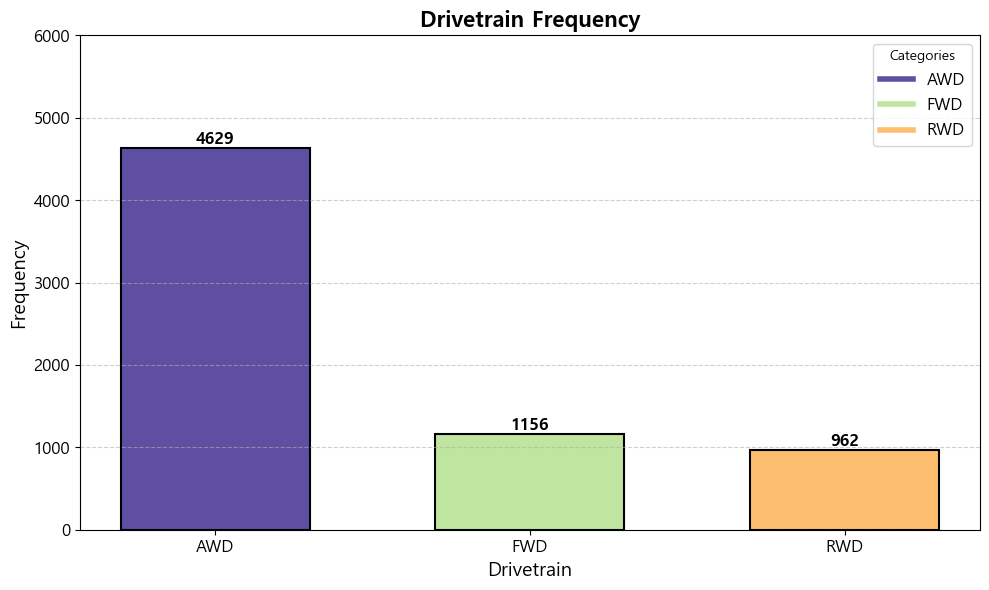

In [7]:
# ----------------------------------------------------------------------------------------------------
# "Drivetrain" 컬럼의 분포도 확인 
# 막대 그래프
# 데이터 준비
data = learning["Drivetrain"].value_counts().reset_index()
data.sort_values(by="Drivetrain",
                 ascending=True,
                 inplace=True)

categories = data["Drivetrain"]
values = data["count"]

# 연속적인 색상 맵 사용 
cmap = plt.colormaps["Spectral_r"]  # 'viridis'는 256개의 색상
colors = [cmap(i / len(data)) for i in range(len(data))]  # 데이터를 기반으로 색상을 비율로 할당

# 그래프 크기 설정
fig, ax = plt.subplots(figsize=(10, 6))

# 막대 그래프 그리기
bars = ax.bar(categories, values, color=colors, width=0.6, edgecolor='black', linewidth=1.5)

# 막대 위에 빈도수 표시 및 조정
for i, bar in enumerate(bars):
    height = bar.get_height()
    # 막대 위에 빈도수 텍스트 추가 (오버플로우 방지로 텍스트 위치 조정)
    ax.text(bar.get_x() + bar.get_width() / 2, height + 2, 
            str(height), ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

# x축에 대한 눈금 설정 (set_xticks 사용)
ax.set_xticks(range(len(data)))

# x축 레이블을 설정
ax.set_xlabel('Drivetrain', fontsize=14)
ax.set_xticklabels(categories, rotation=0, fontsize=12)

# y축 레이블 설정 및 범위 지정
ax.set_ylabel('Frequency', fontsize=14)
ax.set_ylim(0, 6000)

# 그래프 제목 추가
ax.set_title('Drivetrain Frequency', fontsize=16, weight='bold')

# 그리드 설정 (배경 그리드)
ax.grid(True, axis='y', linestyle='--', alpha=0.6)

# x축과 y축의 라벨 간격 및 배치 조정
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# 범례 추가 (범주에 맞는 색상으로 범례 설정)
handles = [plt.Line2D([0], [0], color=color, lw=4) for color in colors]
ax.legend(handles, categories, title="Categories", loc='best', fontsize=12)

# 레이아웃 자동 조정
plt.tight_layout()

# 그래프 표시
plt.show()
# ----------------------------------------------------------------------------------------------------

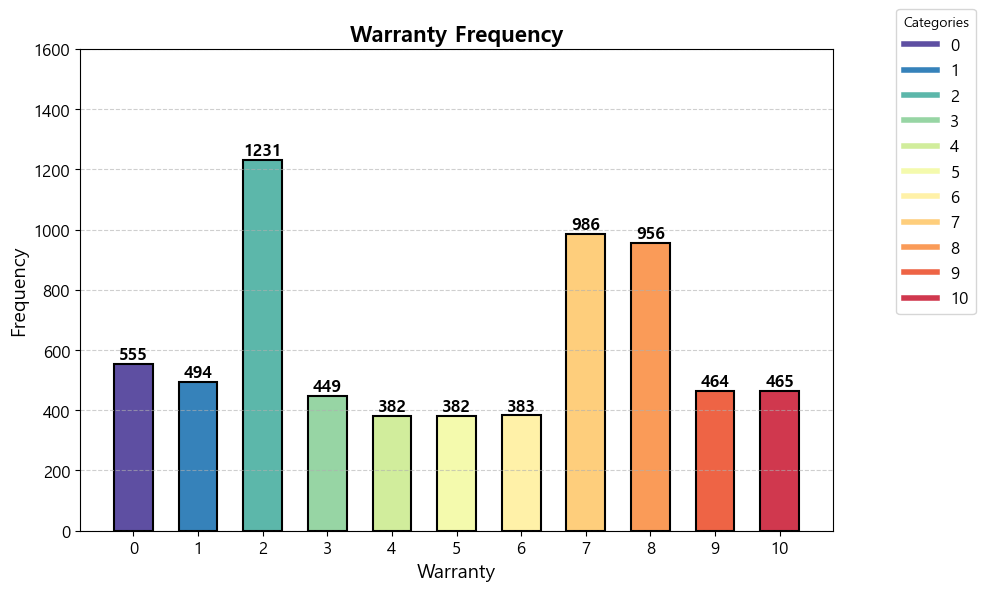

In [8]:
# ----------------------------------------------------------------------------------------------------
# "Warranty" 컬럼의 분포도 확인 
# 막대 그래프
# 데이터 준비
data = learning["Warranty"].value_counts().reset_index()
data.sort_values(by="Warranty",
                 ascending=True,
                 inplace=True)

categories = data["Warranty"]
values = data["count"]

# 연속적인 색상 맵 사용 
cmap = plt.colormaps["Spectral_r"]  # 'viridis'는 256개의 색상
colors = [cmap(i / len(data)) for i in range(len(data))]  # 데이터를 기반으로 색상을 비율로 할당

# 그래프 크기 설정
fig, ax = plt.subplots(figsize=(10, 6))

# 막대 그래프 그리기
bars = ax.bar(categories, values, color=colors, width=0.6, edgecolor='black', linewidth=1.5)

# 막대 위에 빈도수 표시 및 조정
for i, bar in enumerate(bars):
    height = bar.get_height()
    # 막대 위에 빈도수 텍스트 추가 (오버플로우 방지로 텍스트 위치 조정)
    ax.text(bar.get_x() + bar.get_width() / 2, height + 2, 
            str(height), ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

# x축에 대한 눈금 설정 (set_xticks 사용)
ax.set_xticks(range(len(data)))

# x축 레이블을 설정
ax.set_xlabel('Warranty', fontsize=14)
ax.set_xticklabels(categories, rotation=0, fontsize=12)

# y축 레이블 설정 및 범위 지정
ax.set_ylabel('Frequency', fontsize=14)
ax.set_ylim(0, 1600)

# 그래프 제목 추가
ax.set_title('Warranty Frequency', fontsize=16, weight='bold')

# 그리드 설정 (배경 그리드)
ax.grid(True, axis='y', linestyle='--', alpha=0.6)

# x축과 y축의 라벨 간격 및 배치 조정
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# 범례 추가 (bbox_to_anchor로 범례 위치 조정)
handles = [plt.Line2D([0], [0], color=color, lw=4) for color in colors]
ax.legend(handles, categories, title="Categories", loc='upper right', fontsize=12, bbox_to_anchor=(1.2, 1.1))

# 레이아웃 자동 조정
plt.tight_layout()

# 그래프 표시
plt.show()
# ----------------------------------------------------------------------------------------------------

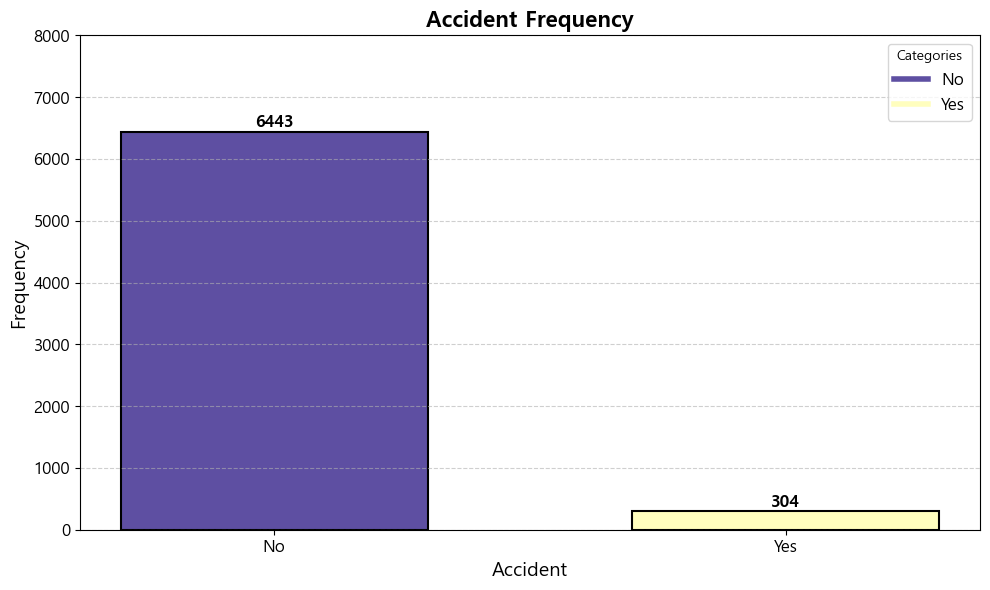

In [9]:
# ----------------------------------------------------------------------------------------------------
# "Accident" 컬럼의 분포도 확인 
# 막대 그래프
# 데이터 준비
data = learning["Accident"].value_counts().reset_index()
data.sort_values(by="Accident",
                 ascending=True,
                 inplace=True)

categories = data["Accident"]
values = data["count"]

# 연속적인 색상 맵 사용 
cmap = plt.colormaps["Spectral_r"]  # 'viridis'는 256개의 색상
colors = [cmap(i / len(data)) for i in range(len(data))]  # 데이터를 기반으로 색상을 비율로 할당

# 그래프 크기 설정
fig, ax = plt.subplots(figsize=(10, 6))

# 막대 그래프 그리기
bars = ax.bar(categories, values, color=colors, width=0.6, edgecolor='black', linewidth=1.5)

# 막대 위에 빈도수 표시 및 조정
for i, bar in enumerate(bars):
    height = bar.get_height()
    # 막대 위에 빈도수 텍스트 추가 (오버플로우 방지로 텍스트 위치 조정)
    ax.text(bar.get_x() + bar.get_width() / 2, height + 2, 
            str(height), ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

# x축에 대한 눈금 설정 (set_xticks 사용)
ax.set_xticks(range(len(data)))

# x축 레이블을 설정
ax.set_xlabel('Accident', fontsize=14)
ax.set_xticklabels(categories, rotation=0, fontsize=12)

# y축 레이블 설정 및 범위 지정
ax.set_ylabel('Frequency', fontsize=14)
ax.set_ylim(0, 8000)

# 그래프 제목 추가
ax.set_title('Accident Frequency', fontsize=16, weight='bold')

# 그리드 설정 (배경 그리드)
ax.grid(True, axis='y', linestyle='--', alpha=0.6)

# x축과 y축의 라벨 간격 및 배치 조정
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# 범례 추가 (범주에 맞는 색상으로 범례 설정)
handles = [plt.Line2D([0], [0], color=color, lw=4) for color in colors]
ax.legend(handles, categories, title="Categories", loc='best', fontsize=12)

# 레이아웃 자동 조정
plt.tight_layout()

# 그래프 표시
plt.show()
# ----------------------------------------------------------------------------------------------------

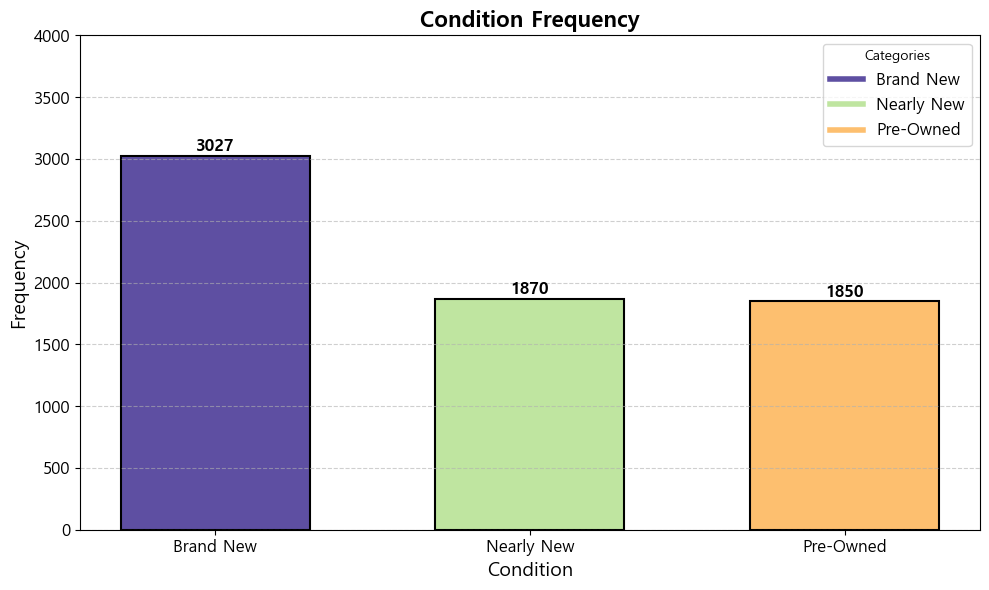

In [10]:
# ----------------------------------------------------------------------------------------------------
# "Condition" 컬럼의 분포도 확인 
# 막대 그래프
# 데이터 준비
data = learning["Condition"].value_counts().reset_index()
data.sort_values(by="Condition",
                 ascending=True,
                 inplace=True)

categories = data["Condition"]
values = data["count"]

# 연속적인 색상 맵 사용 
cmap = plt.colormaps["Spectral_r"]  # 'viridis'는 256개의 색상
colors = [cmap(i / len(data)) for i in range(len(data))]  # 데이터를 기반으로 색상을 비율로 할당

# 그래프 크기 설정
fig, ax = plt.subplots(figsize=(10, 6))

# 막대 그래프 그리기
bars = ax.bar(categories, values, color=colors, width=0.6, edgecolor='black', linewidth=1.5)

# 막대 위에 빈도수 표시 및 조정
for i, bar in enumerate(bars):
    height = bar.get_height()
    # 막대 위에 빈도수 텍스트 추가 (오버플로우 방지로 텍스트 위치 조정)
    ax.text(bar.get_x() + bar.get_width() / 2, height + 2, 
            str(height), ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

# x축에 대한 눈금 설정 (set_xticks 사용)
ax.set_xticks(range(len(data)))

# x축 레이블을 설정
ax.set_xlabel('Condition', fontsize=14)
ax.set_xticklabels(categories, rotation=0, fontsize=12)

# y축 레이블 설정 및 범위 지정
ax.set_ylabel('Frequency', fontsize=14)
ax.set_ylim(0, 4000)

# 그래프 제목 추가
ax.set_title('Condition Frequency', fontsize=16, weight='bold')

# 그리드 설정 (배경 그리드)
ax.grid(True, axis='y', linestyle='--', alpha=0.6)

# x축과 y축의 라벨 간격 및 배치 조정
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# 범례 추가 (범주에 맞는 색상으로 범례 설정)
handles = [plt.Line2D([0], [0], color=color, lw=4) for color in colors]
ax.legend(handles, categories, title="Categories", loc='best', fontsize=12)

# 레이아웃 자동 조정
plt.tight_layout()

# 그래프 표시
plt.show()
# ----------------------------------------------------------------------------------------------------

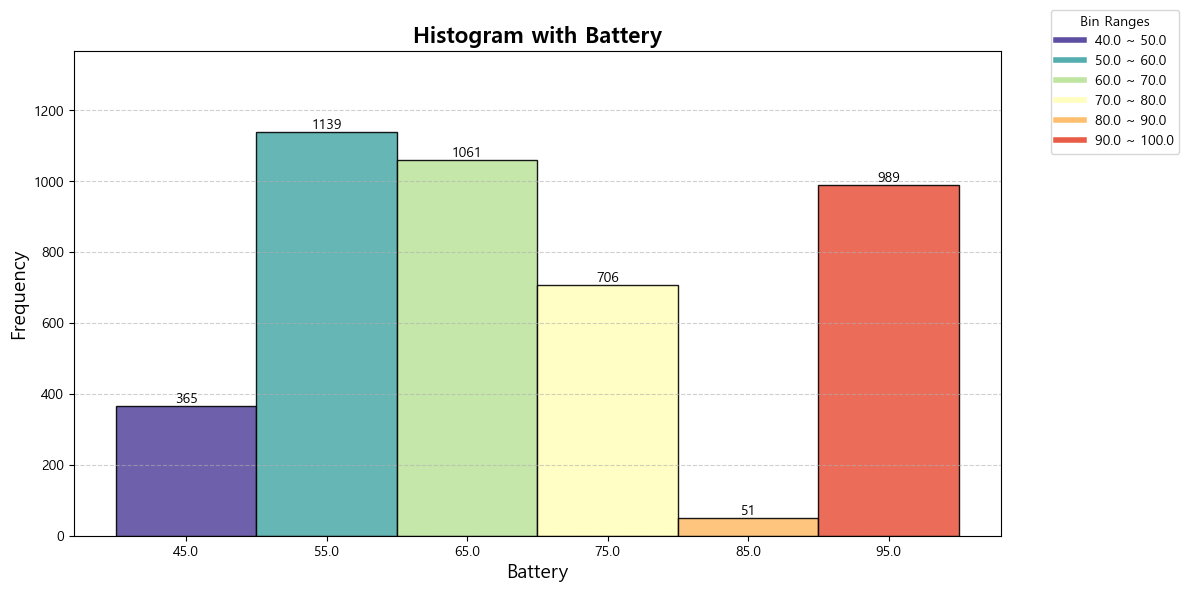

In [ ]:
# ----------------------------------------------------------------------------------------------------
# "Battery" 컬럼의 분포도 확인 
# 히스토그램

# 데이터 준비
data = learning.loc[pd.notnull(learning["Battery"]), "Battery"]

# 그래프 크기 설정
plt.figure(figsize=(12, 6))

# 히스토그램 구간 설정
bins = [40, 50, 60, 70, 80, 90, 100]

# 히스토그램 계산 (빈도수와 구간 경계)
counts, bin_edges = np.histogram(data, bins=bins)

# 컬러맵 설정 (Spectral_r)
cmap = plt.get_cmap('Spectral_r')
colors = [cmap(i / (len(bins) - 1)) for i in range(len(bins)-1)]  # 각 구간마다 다른 색상

# 구간의 중심값 계산
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # 구간 중심값 계산

# 구간의 첫 번째 값과 마지막 값을 기준으로 범례 라벨 생성 (예: "45 ~ 50")
legend_labels = [f'{bin_edges[i]:.1f} ~ {bin_edges[i+1]:.1f}' for i in range(len(bins)-1)]

# 막대 그래프 그리기 (각 막대마다 색상 설정)
for i in range(len(bins)-1):
    plt.bar(bin_edges[i], counts[i], width=(bin_edges[i+1] - bin_edges[i]), color=colors[i],
            edgecolor='black', align='edge', alpha=0.9)

# x축 눈금 (구간의 중심값 기준으로 설정)
plt.xticks(bin_centers, labels=[f'{center:.1f}' for center in bin_centers], fontsize=10)

# 범례 추가 (구간의 시작 ~ 끝 값으로 표시)
handles = [plt.Line2D([0], [0], color=colors[i], lw=4) for i in range(len(bins)-1)]
plt.legend(handles, legend_labels, title="Bin Ranges", loc='upper right', fontsize=10, bbox_to_anchor=(1.2, 1.1))

# x축, y축 레이블 및 제목 추가
plt.xlabel('Battery', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Histogram with Battery', fontsize=16, weight='bold')

# y축 범위 및 그리드 설정
plt.ylim(0, max(counts) * 1.2)
plt.grid(True, axis='y', linestyle='--', alpha=0.6)

# 막대 위 빈도수 표시
for count, center in zip(counts, bin_centers):
    plt.text(center, count + 1, f'{int(count)}', ha='center', va='bottom', fontsize=10)

# 레이아웃 자동 조정
plt.tight_layout()

# 그래프 표시
plt.show()
# ----------------------------------------------------------------------------------------------------

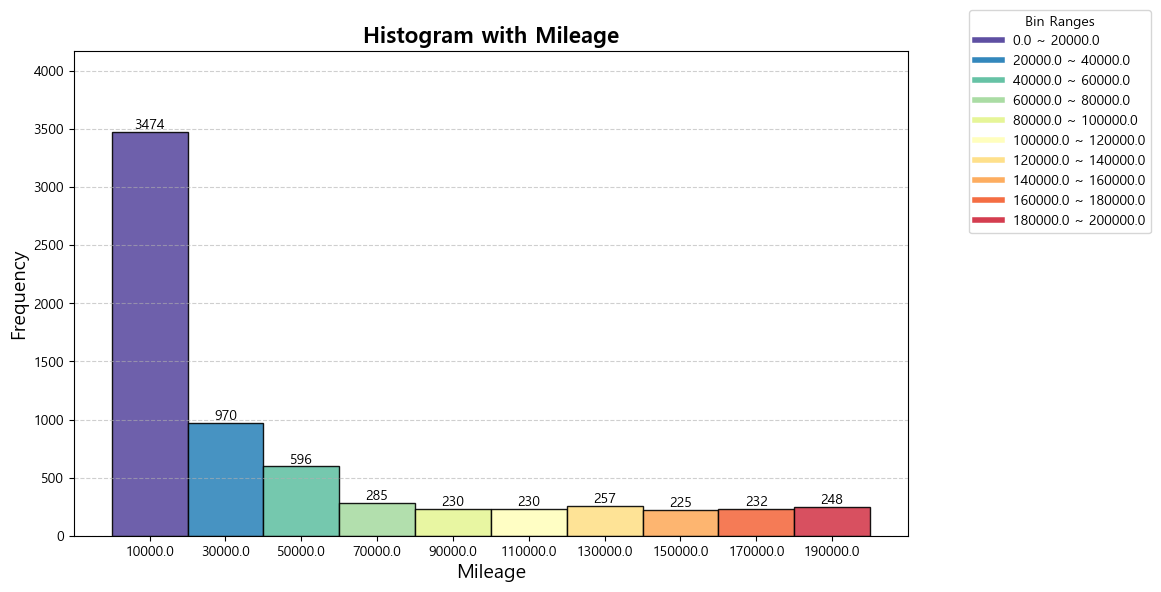

In [11]:
# ----------------------------------------------------------------------------------------------------
# "Mileage" 컬럼의 분포도 확인 
# 히스토그램 

# 데이터 준비
data = learning["Mileage"]

# 그래프 크기 설정
plt.figure(figsize=(12, 6))

# 히스토그램 구간 설정
bins = [0, 20000, 40000, 60000, 80000, 100000, 120000, 140000, 160000, 180000, 200000]  # 구간 직접 규정 
counts, bin_edges, _ = plt.hist(data, bins=bins, edgecolor='black', alpha=0)  # 히스토그램 계산만 수행

# 히스토그램 계산
counts, bin_edges, _ = plt.hist(data, bins=bins, edgecolor='black', alpha=0)  # 히스토그램 계산만 수행

# 컬러맵 설정 (Spectral_r)
cmap = plt.get_cmap('Spectral_r')
colors = [cmap(i / (len(bins) - 1)) for i in range(len(bins)-1)]  # 각 구간마다 다른 색상

# 막대 그래프 그리기 (각 막대마다 색상 설정)
bars = []
for i in range(len(bins)-1):
    bar = plt.bar(bin_edges[i], counts[i], width=(bin_edges[i+1] - bin_edges[i]),
                  color=colors[i], edgecolor='black', align='edge', alpha=0.9)
    bars.append(bar)

# x축 눈금 (구간 중심값으로 설정)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # 구간 중심값 계산
plt.xticks(bin_centers, labels=[f'{center:.1f}' for center in bin_centers], fontsize=10)

# 범례 추가 (구간 시작값과 끝값 표시)
legend_labels = [f'{bin_edges[i]:.1f} ~ {bin_edges[i+1]:.1f}' for i in range(len(bins)-1)]
handles = [plt.Line2D([0], [0], color=colors[i], lw=4) for i in range(len(bins)-1)]
plt.legend(handles, legend_labels, title="Bin Ranges", loc='upper right', fontsize=10, bbox_to_anchor=(1.3, 1.1))

# x축, y축 레이블 및 제목 추가
plt.xlabel('Mileage', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Histogram with Mileage', fontsize=16, weight='bold')

# y축 범위 및 그리드 설정
plt.ylim(0, max(counts) * 1.2)
plt.grid(True, axis='y', linestyle='--', alpha=0.6)

# 막대 위 빈도수 표시
for count, center in zip(counts, bin_centers):
    plt.text(center, count + 1, f'{int(count)}', ha='center', va='bottom', fontsize=10)

# 레이아웃 자동 조정
plt.tight_layout()

# 그래프 표시
plt.show()
# ----------------------------------------------------------------------------------------------------

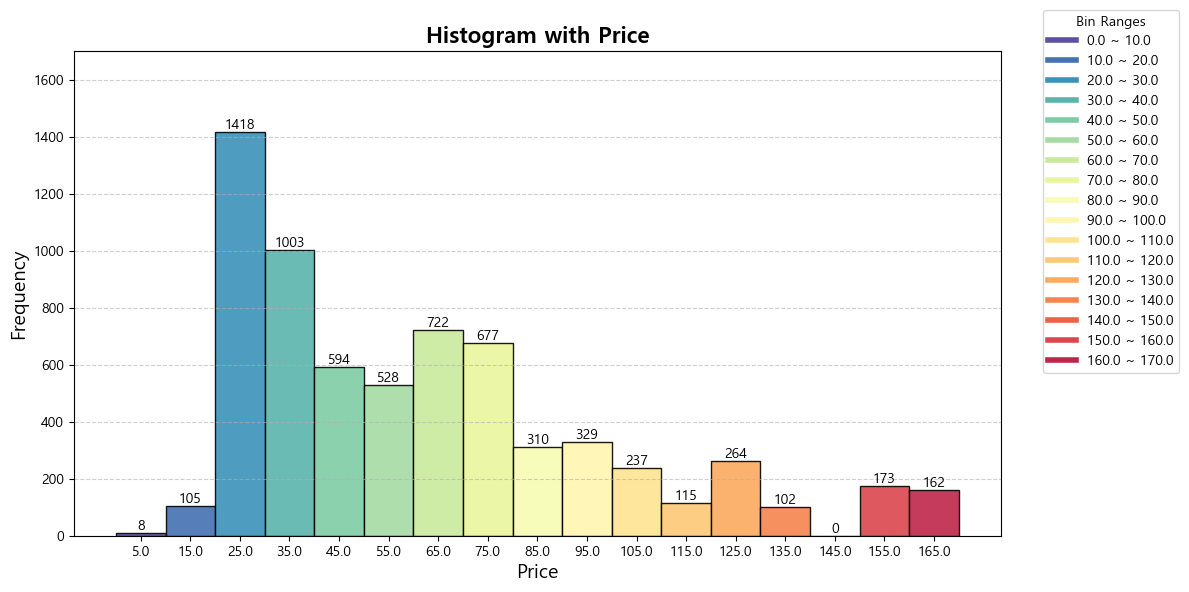

In [12]:
# ----------------------------------------------------------------------------------------------------
# "Price" 컬럼의 분포도 확인 
# 히스토그램 

# 데이터 준비
data = learning["Price"]

# 그래프 크기 설정
plt.figure(figsize=(12, 6))

# 구간 경계 설정
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170]  # 구간을 직접 지정

# 히스토그램 계산
counts, bin_edges, _ = plt.hist(data, bins=bins, edgecolor='black', alpha=0)  # 히스토그램 계산만 수행

# 컬러맵 설정 (Spectral_r)
cmap = plt.get_cmap('Spectral_r')
colors = [cmap(i / (len(bins) - 1)) for i in range(len(bins)-1)]  # 각 구간마다 다른 색상

# 막대 그래프 그리기 (각 막대마다 색상 설정)
bars = []
for i in range(len(bins)-1):
    bar = plt.bar(bin_edges[i], counts[i], width=(bin_edges[i+1] - bin_edges[i]),
                  color=colors[i], edgecolor='black', align='edge', alpha=0.9)
    bars.append(bar)

# x축 눈금 (구간 중심값으로 설정)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # 구간 중심값 계산
plt.xticks(bin_centers, labels=[f'{center:.1f}' for center in bin_centers], fontsize=10)

# 범례 추가 (구간 시작값과 끝값 표시)
legend_labels = [f'{bin_edges[i]:.1f} ~ {bin_edges[i+1]:.1f}' for i in range(len(bins)-1)]
handles = [plt.Line2D([0], [0], color=colors[i], lw=4) for i in range(len(bins)-1)]
plt.legend(handles, legend_labels, title="Bin Ranges", loc='upper right', fontsize=10, bbox_to_anchor=(1.2, 1.1))

# x축, y축 레이블 및 제목 추가
plt.xlabel('Price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Histogram with Price', fontsize=16, weight='bold')

# y축 범위 및 그리드 설정
plt.ylim(0, max(counts) * 1.2)
plt.grid(True, axis='y', linestyle='--', alpha=0.6)

# 막대 위 빈도수 표시
for count, center in zip(counts, bin_centers):
    plt.text(center, count + 1, f'{int(count)}', ha='center', va='bottom', fontsize=10)

# 레이아웃 자동 조정
plt.tight_layout()

# 그래프 표시
plt.show()
# ----------------------------------------------------------------------------------------------------